In [2]:
# first neural network with keras tutorial
import tensorflow as tf
from tensorflow import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from numpy import asarray
from numpy import unique
from numpy import argmax
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils.vis_utils import plot_model


ModuleNotFoundError: No module named 'tensorflow'

In [4]:
%pip install tensorflow


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.8/390.3 MB 10.1 MB/s eta 0:00:39
   ---------------------------------------- 3.9/390.3 MB 9.8 MB/s eta 0:00:40
    --------------------------------------- 6.0/390.3 MB 10.5 MB/s eta 0:00:37
    --------------------------------------- 8.4/390.3 MB 10.4 MB/s eta 0:00:37
   - -------------------------------------- 10.7/390.3 MB 10.7 MB/s eta 0:00:36
   - -------------------------------------- 13.1/390.3 MB 10.7 MB/s eta 0:00:36
   - -------------------------------------- 15.7/390.3 MB 10.9 MB/s eta 0:00:35
   - -------------------------------------- 17.6/390.3 MB 10.8 MB/s eta 0:00:35
   -- ------------------------------------- 19.9/390.3 MB 10.8 MB/s eta 0:00:35
   -- ------------------------------------- 22.3/390.3 MB 10.8 MB/s eta 0:00:34
   -- ------------------------------------- 24.6/390.3 MB 10.8 MB/s eta 0:00:34
   -- ------------------------------------- 27.3/390.3

In [16]:
# load the dataset
dataset = loadtxt('datas.csv', delimiter=',') 

In [17]:
# #ESSAI 3  -----OK
X = dataset[:,0:7]
y = dataset[:,7]
scalarX, scalarY = MinMaxScaler(feature_range=(0,0.75)), MinMaxScaler(feature_range=(0,0.75))
scalarX.fit(X)
scalarY.fit(y.reshape(94,1)) 
X = scalarX.transform(X)
y=np.array(y).reshape(94,1) 
y = scalarY.transform(y) 

In [18]:
print(y)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.71983935e-04]
 [2.18923901e-03]
 [4.74422103e-03]
 [8.22762667e-03]
 [1.23189629e-02]
 [1.77387289e-02]
 [2.42075523e-02]
 [3.08176139e-02]
 [3.95917972e-02]
 [4.92520136e-02]
 [5.97893942e-02]
 [7.09169107e-02]
 [8.20202916e-02]
 [9.185824

In [32]:
print(X)

[[0.         0.         0.         0.66412214 0.26923077 0.
  0.        ]
 [0.00806452 0.         0.         0.68702288 0.30769231 0.
  0.        ]
 [0.01612903 0.05769256 0.         0.68702288 0.38461538 0.06428571
  0.03191489]
 [0.02419355 0.05769256 0.         0.68702288 0.48076923 0.17142857
  0.07978723]
 [0.03225806 0.11538512 0.09036145 0.37786261 0.53846154 0.36428571
  0.28723404]
 [0.04032258 0.11538512 0.37951807 0.2977099  0.48076923 0.42857143
  0.35106383]
 [0.0483871  0.11538512 0.21686747 0.31488549 0.19230769 0.12857143
  0.11170213]
 [0.05645161 0.17307702 0.09036145 0.40648856 0.19230769 0.
  0.03191489]
 [0.06451613 0.17307702 0.04518072 0.38358776 0.32692308 0.15
  0.12765957]
 [0.07258065 0.23076958 0.         0.5381679  0.42307692 0.3
  0.2393617 ]
 [0.08064516 0.23076958 0.         0.48091599 0.5        0.42857143
  0.35106383]
 [0.08870968 0.23076958 0.         0.41793893 0.5        0.49285714
  0.41489362]
 [0.09677419 0.28846149 0.02710843 0.27480916 0.51923

In [19]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu')) #kernel_initializer='normal'
model.add(Dense(1, kernel_initializer='normal', activation='linear')) #linear
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [26]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=60, batch_size=4, verbose=2, validation_split=0.20)

Epoch 1/60
19/19 - 0s - loss: 0.0109 - val_loss: 0.0795 - 82ms/epoch - 4ms/step
Epoch 2/60
19/19 - 0s - loss: 0.0107 - val_loss: 0.0738 - 68ms/epoch - 4ms/step
Epoch 3/60
19/19 - 0s - loss: 0.0139 - val_loss: 0.0705 - 68ms/epoch - 4ms/step
Epoch 4/60
19/19 - 0s - loss: 0.0102 - val_loss: 0.0774 - 59ms/epoch - 3ms/step
Epoch 5/60
19/19 - 0s - loss: 0.0100 - val_loss: 0.0746 - 57ms/epoch - 3ms/step
Epoch 6/60
19/19 - 0s - loss: 0.0103 - val_loss: 0.0721 - 58ms/epoch - 3ms/step
Epoch 7/60
19/19 - 0s - loss: 0.0097 - val_loss: 0.0569 - 57ms/epoch - 3ms/step
Epoch 8/60
19/19 - 0s - loss: 0.0098 - val_loss: 0.0597 - 57ms/epoch - 3ms/step
Epoch 9/60
19/19 - 0s - loss: 0.0099 - val_loss: 0.0694 - 49ms/epoch - 3ms/step
Epoch 10/60
19/19 - 0s - loss: 0.0104 - val_loss: 0.0724 - 65ms/epoch - 3ms/step
Epoch 11/60
19/19 - 0s - loss: 0.0097 - val_loss: 0.0515 - 65ms/epoch - 3ms/step
Epoch 12/60
19/19 - 0s - loss: 0.0101 - val_loss: 0.0590 - 56ms/epoch - 3ms/step
Epoch 13/60
19/19 - 0s - loss: 0.0094

In [27]:
# evaluate on test set
yhat = model.predict(X)
error = mean_absolute_error(y, yhat)
print('MAE: %.5f' % error)

MAE: 0.00901


In [28]:
print(yhat) 

[[-3.3036508e-03]
 [ 2.6994515e-03]
 [-3.6063679e-03]
 [ 6.5127760e-04]
 [-7.4059069e-03]
 [-6.0217083e-04]
 [ 1.2221038e-03]
 [-3.4287926e-03]
 [ 5.6366250e-04]
 [-4.7220923e-03]
 [-1.3171881e-04]
 [ 3.9739162e-03]
 [-3.2682046e-03]
 [-1.7089471e-03]
 [ 4.9766563e-03]
 [ 1.8329471e-03]
 [ 6.7947432e-03]
 [-3.4024045e-03]
 [ 1.3438053e-03]
 [ 7.3633865e-03]
 [-4.9612224e-03]
 [-2.1514930e-03]
 [-2.0585414e-03]
 [ 5.5530909e-03]
 [-5.0178654e-03]
 [ 1.7004982e-03]
 [ 5.7508554e-03]
 [-8.0183782e-03]
 [-2.9476397e-03]
 [ 4.8852451e-03]
 [ 8.7615252e-03]
 [-1.3214666e-02]
 [-6.0471855e-03]
 [-5.0500408e-04]
 [ 8.0011487e-03]
 [ 1.1928819e-02]
 [-1.1689097e-02]
 [-6.1878078e-03]
 [ 1.4701597e-03]
 [ 4.8231408e-03]
 [ 1.2273181e-02]
 [ 1.7806709e-02]
 [ 2.3074262e-02]
 [ 1.1161268e-03]
 [ 6.2411204e-03]
 [ 1.1148095e-02]
 [ 1.5096463e-02]
 [ 2.5203064e-02]
 [ 3.0363396e-02]
 [ 3.8083293e-02]
 [ 4.3665692e-02]
 [ 4.8798062e-02]
 [ 6.5191194e-02]
 [ 7.3443852e-02]
 [ 8.7923549e-02]
 [ 1.02034

In [29]:
print(y) 

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.71983935e-04]
 [2.18923901e-03]
 [4.74422103e-03]
 [8.22762667e-03]
 [1.23189629e-02]
 [1.77387289e-02]
 [2.42075523e-02]
 [3.08176139e-02]
 [3.95917972e-02]
 [4.92520136e-02]
 [5.97893942e-02]
 [7.09169107e-02]
 [8.20202916e-02]
 [9.185824

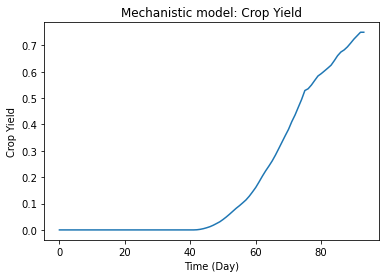

In [30]:
plt.plot(y)
plt.xlabel('Time (Day)')
plt.ylabel('Crop Yield')
plt.title('Mechanistic model: Crop Yield')
plt.show()

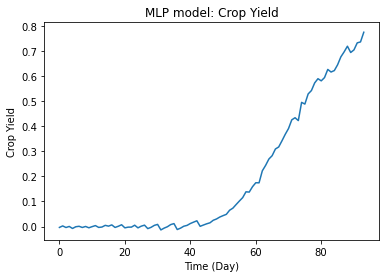

In [31]:
plt.plot(yhat)
plt.xlabel('Time (Day)')
plt.ylabel('Crop Yield')
plt.title('MLP model: Crop Yield')
plt.show()